In [ ]:
import numpy as np
import torch
import math
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from env import Game
from train import TrainAgent, get_model
from pg_model import PolicyNet, ValueNet
from torch import optim
import os
%load_ext autoreload
%autoreload 2

dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

policy, policy_opt = get_model(PolicyNet)
value, value_opt = get_model(ValueNet)

agent = TrainAgent(policy, policy_opt, value, value_opt)

losses = []  
losses += agent.train(epochs=3000, lamda=0.3, epsilon=0.3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Completed with 8117 possible starting states. Start PPO


  0%|          | 1/2000 [00:04<2:36:35,  4.70s/it]

Average score: 464.96, # of starting states: 8117


  5%|▌         | 101/2000 [08:51<2:59:06,  5.66s/it]

Average score: 1028.0, # of starting states: 8161


 10%|█         | 201/2000 [15:59<2:20:14,  4.68s/it]

Average score: 1568.16, # of starting states: 8184


 15%|█▌        | 301/2000 [21:46<1:23:47,  2.96s/it]

Average score: 1570.88, # of starting states: 8268


 20%|██        | 401/2000 [25:33<1:21:54,  3.07s/it]

Average score: 1763.52, # of starting states: 8270


 20%|██        | 410/2000 [25:55<1:40:33,  3.79s/it]


KeyboardInterrupt: 

In [56]:
agent.evalute()

381.7


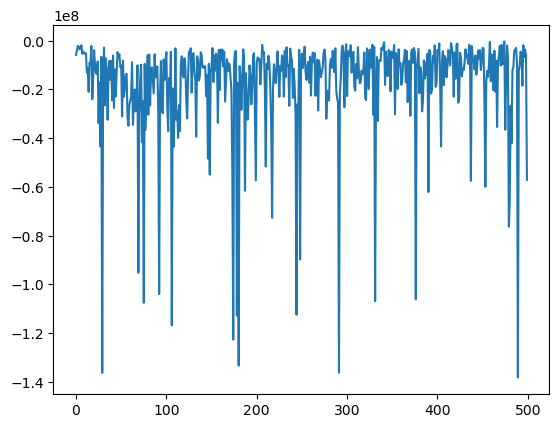

In [21]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [22]:
from tqdm import tqdm
game = Game()
game.print()
dir = {0:"left", 1:"up", 2:"right", 3:"down"}
while not game.end_game:
    s = game.get_s().to(dev)[None, ...]
    p = policy(s).squeeze().detach()
    v = value(s).squeeze().detach()
    a = torch.multinomial(p, num_samples=1).item()
    r = game.step(a)
    print(p, v, dir[a])
    game.print()

Your current score: 0
Your current game board:
0	0	0	0	
0	0	0	0	
0	0	0	0	
0	2	0	2	
tensor([1.6257e-04, 9.8454e-04, 9.5718e-01, 4.1671e-02]) tensor(898.2278) right
Your current score: 4
Your current game board:
0	0	0	0	
0	0	0	0	
0	0	0	0	
0	0	2	4	
tensor([0.0009, 0.0038, 0.6276, 0.3677]) tensor(845.1713) down
Your current score: 4
Your current game board:
0	0	0	0	
0	0	0	0	
0	0	0	0	
0	0	2	4	
tensor([9.9630e-01, 4.0972e-07, 5.6755e-12, 3.6958e-03]) tensor(869.5379) left
Your current score: 4
Your current game board:
0	0	0	0	
0	0	0	0	
0	0	0	0	
2	4	0	2	
tensor([2.3494e-05, 1.8189e-04, 9.9407e-01, 5.7223e-03]) tensor(1073.1514) right
Your current score: 4
Your current game board:
2	0	0	0	
0	0	0	0	
0	0	0	0	
0	2	4	2	
tensor([2.5291e-05, 4.5754e-04, 9.8888e-01, 1.0642e-02]) tensor(1239.5371) right
Your current score: 4
Your current game board:
0	0	2	2	
0	0	0	0	
0	0	0	0	
0	2	4	2	
tensor([6.6879e-05, 1.3172e-04, 8.2612e-01, 1.7368e-01]) tensor(1279.8256) right
Your current score: 8
Your current ga

In [26]:
from tqdm import tqdm

tot = 0
for i in tqdm(range(100)):
    game = Game()
    while not game.end_game:
        a = game.get_greedy_a()
        # a = np.random.randint(0, 4)
        # s = game.get_s().to(dev)[None, ...]
        # p = policy(s).squeeze()
        # a = torch.multinomial(p, num_samples=1).item()
        r = game.step(a)
    tot += game.score
print(tot / 100)

100%|██████████| 100/100 [00:09<00:00, 10.74it/s]

3443.88
